In [1]:
import pandas as pd

In [7]:
try:
    legs_path = snakemake.input[0]
    output_path = snakemake.output[0]
except NameError:
    legs_path = "../data/routing_output_legs.csv"
    output_path = "../data/contacts.csv"

In [14]:
df_legs = pd.read_csv(legs_path)
df_legs["personId"] = df_legs["identifier"].apply(lambda x: x.split("###")[0]).astype(int)
df_legs = df_legs[["personId", "vehicleId", "accessTime", "egressTime"]]

In [23]:
# Find contacts per vehicle

first_person_ids = []
second_person_ids = []
vehicle_ids = []
durations = []
times = []

unique_vehicle_ids = df_legs["vehicleId"].unique()

for vehicle_index, vehicle_id in enumerate(unique_vehicle_ids):
    print("Vehicle {}/{} {}".format(vehicle_index + 1, len(unique_vehicle_ids), vehicle_id))
    df_vehicle = df_legs[df_legs["vehicleId"] == vehicle_id]
    
    person_ids = list(df_vehicle["personId"].unique())
    
    for u, first_id in enumerate(person_ids):
        df_first = df_vehicle[df_vehicle["personId"] == first_id]
        
        for v, second_id in enumerate(person_ids):            
            if v > u:
                df_second = df_vehicle[df_vehicle["personId"] == second_id]
                total_duration = 0.0
                
                for start_first, end_first in zip(df_first["accessTime"], df_first["egressTime"]):
                    for start_second, end_second in zip(df_second["accessTime"], df_second["egressTime"]):
                        # Check if second intersects with first and count interaction duration
                        
                        if start_second <= end_first and end_second > start_first:
                            # We have an intersection
                            
                            interaction_start = max(start_first, start_second)
                            interaction_end = min(end_first, end_second)
                            duration = interaction_end - interaction_start
                
                            first_person_ids.append(first_id)
                            second_person_ids.append(second_id)
                            durations.append(duration)
                            times.append(interaction_start)
                            vehicle_ids.append(vehicle_id)
                    
df_contacts = pd.DataFrame({ 
    "firstId": first_person_ids, "secondId": second_person_ids,
    "vehicleId": vehicle_ids, "duration": durations, "time": times
})

Vehicle 1/10519 veh_33241_bus
Vehicle 2/10519 veh_106645_rail
Vehicle 3/10519 veh_45659_bus
Vehicle 4/10519 veh_57058_bus
Vehicle 5/10519 veh_89409_tram
Vehicle 6/10519 veh_109022_rail
Vehicle 7/10519 veh_104005_rail
Vehicle 8/10519 veh_41885_bus
Vehicle 9/10519 veh_43670_bus
Vehicle 10/10519 veh_15466_bus
Vehicle 11/10519 veh_82527_subway
Vehicle 12/10519 veh_80758_subway
Vehicle 13/10519 veh_81992_subway
Vehicle 14/10519 veh_78273_subway
Vehicle 15/10519 veh_54666_bus
Vehicle 16/10519 veh_42848_bus
Vehicle 17/10519 veh_44245_bus
Vehicle 18/10519 veh_6848_bus
Vehicle 19/10519 veh_80413_subway
Vehicle 20/10519 veh_48578_bus
Vehicle 21/10519 veh_78259_subway
Vehicle 22/10519 veh_51650_bus
Vehicle 23/10519 veh_91859_bus
Vehicle 24/10519 veh_83425_subway
Vehicle 25/10519 veh_55366_bus
Vehicle 26/10519 veh_57352_bus
Vehicle 27/10519 veh_74510_bus
Vehicle 28/10519 veh_41391_bus
Vehicle 29/10519 veh_78169_subway
Vehicle 30/10519 veh_106174_rail
Vehicle 31/10519 veh_86184_subway
Vehicle 32/10

Vehicle 332/10519 veh_11188_bus
Vehicle 333/10519 veh_46507_bus
Vehicle 334/10519 veh_12941_bus
Vehicle 335/10519 veh_12783_bus
Vehicle 336/10519 veh_67068_bus
Vehicle 337/10519 veh_79568_subway
Vehicle 338/10519 veh_46353_bus
Vehicle 339/10519 veh_40539_bus
Vehicle 340/10519 veh_81023_subway
Vehicle 341/10519 veh_73912_bus
Vehicle 342/10519 veh_93238_bus
Vehicle 343/10519 veh_28013_bus
Vehicle 344/10519 veh_83110_subway
Vehicle 345/10519 veh_82047_subway
Vehicle 346/10519 veh_98801_bus
Vehicle 347/10519 veh_92410_bus
Vehicle 348/10519 veh_89211_tram
Vehicle 349/10519 veh_5678_bus
Vehicle 350/10519 veh_5526_bus
Vehicle 351/10519 veh_80171_subway
Vehicle 352/10519 veh_34961_bus
Vehicle 353/10519 veh_85043_subway
Vehicle 354/10519 veh_83527_subway
Vehicle 355/10519 veh_103707_rail
Vehicle 356/10519 veh_83043_subway
Vehicle 357/10519 veh_78453_subway
Vehicle 358/10519 veh_75431_bus
Vehicle 359/10519 veh_14634_bus
Vehicle 360/10519 veh_27296_bus
Vehicle 361/10519 veh_106122_rail
Vehicle 36

Vehicle 650/10519 veh_104400_bus
Vehicle 651/10519 veh_97515_bus
Vehicle 652/10519 veh_17152_bus
Vehicle 653/10519 veh_13892_bus
Vehicle 654/10519 veh_13818_bus
Vehicle 655/10519 veh_88518_tram
Vehicle 656/10519 veh_38080_bus
Vehicle 657/10519 veh_35453_bus
Vehicle 658/10519 veh_105246_rail
Vehicle 659/10519 veh_107503_tram
Vehicle 660/10519 veh_103613_rail
Vehicle 661/10519 veh_102726_bus
Vehicle 662/10519 veh_104198_rail
Vehicle 663/10519 veh_78638_subway
Vehicle 664/10519 veh_82442_subway
Vehicle 665/10519 veh_74893_bus
Vehicle 666/10519 veh_57186_bus
Vehicle 667/10519 veh_35486_bus
Vehicle 668/10519 veh_106052_rail
Vehicle 669/10519 veh_79569_subway
Vehicle 670/10519 veh_107116_rail
Vehicle 671/10519 veh_45897_bus
Vehicle 672/10519 veh_46375_bus
Vehicle 673/10519 veh_83154_subway
Vehicle 674/10519 veh_29511_bus
Vehicle 675/10519 veh_62818_bus
Vehicle 676/10519 veh_104060_rail
Vehicle 677/10519 veh_60371_bus
Vehicle 678/10519 veh_94387_bus
Vehicle 679/10519 veh_83285_subway
Vehicle 

Vehicle 942/10519 veh_78930_subway
Vehicle 943/10519 veh_84218_subway
Vehicle 944/10519 veh_72071_bus
Vehicle 945/10519 veh_7959_bus
Vehicle 946/10519 veh_42611_bus
Vehicle 947/10519 veh_39381_bus
Vehicle 948/10519 veh_84995_subway
Vehicle 949/10519 veh_78220_subway
Vehicle 950/10519 veh_33764_bus
Vehicle 951/10519 veh_82343_subway
Vehicle 952/10519 veh_89759_tram
Vehicle 953/10519 veh_35478_bus
Vehicle 954/10519 veh_57189_bus
Vehicle 955/10519 veh_30378_bus
Vehicle 956/10519 veh_3874_bus
Vehicle 957/10519 veh_85655_subway
Vehicle 958/10519 veh_106212_rail
Vehicle 959/10519 veh_2962_bus
Vehicle 960/10519 veh_24011_bus
Vehicle 961/10519 veh_24047_bus
Vehicle 962/10519 veh_103695_rail
Vehicle 963/10519 veh_83431_subway
Vehicle 964/10519 veh_85382_subway
Vehicle 965/10519 veh_55903_bus
Vehicle 966/10519 veh_73430_bus
Vehicle 967/10519 veh_54035_bus
Vehicle 968/10519 veh_89417_tram
Vehicle 969/10519 veh_79390_subway
Vehicle 970/10519 veh_37185_bus
Vehicle 971/10519 veh_105485_rail
Vehicle 

Vehicle 1304/10519 veh_108435_rail
Vehicle 1305/10519 veh_3690_bus
Vehicle 1306/10519 veh_30337_bus
Vehicle 1307/10519 veh_104270_rail
Vehicle 1308/10519 veh_81039_subway
Vehicle 1309/10519 veh_81406_subway
Vehicle 1310/10519 veh_39196_bus
Vehicle 1311/10519 veh_108873_rail
Vehicle 1312/10519 veh_108677_rail
Vehicle 1313/10519 veh_78554_subway
Vehicle 1314/10519 veh_81763_subway
Vehicle 1315/10519 veh_75703_bus
Vehicle 1316/10519 veh_103699_rail
Vehicle 1317/10519 veh_59039_bus
Vehicle 1318/10519 veh_107158_rail
Vehicle 1319/10519 veh_81761_subway
Vehicle 1320/10519 veh_82051_subway
Vehicle 1321/10519 veh_36552_bus
Vehicle 1322/10519 veh_106159_rail
Vehicle 1323/10519 veh_74524_bus
Vehicle 1324/10519 veh_20310_bus
Vehicle 1325/10519 veh_78566_subway
Vehicle 1326/10519 veh_82542_subway
Vehicle 1327/10519 veh_30388_bus
Vehicle 1328/10519 veh_103974_rail
Vehicle 1329/10519 veh_29799_bus
Vehicle 1330/10519 veh_29224_bus
Vehicle 1331/10519 veh_47138_bus
Vehicle 1332/10519 veh_52978_bus
Vehi

Vehicle 1561/10519 veh_64010_bus
Vehicle 1562/10519 veh_17698_bus
Vehicle 1563/10519 veh_42092_bus
Vehicle 1564/10519 veh_103607_rail
Vehicle 1565/10519 veh_16474_bus
Vehicle 1566/10519 veh_81043_subway
Vehicle 1567/10519 veh_56620_bus
Vehicle 1568/10519 veh_38295_bus
Vehicle 1569/10519 veh_104607_rail
Vehicle 1570/10519 veh_83157_subway
Vehicle 1571/10519 veh_14064_bus
Vehicle 1572/10519 veh_104338_rail
Vehicle 1573/10519 veh_74935_bus
Vehicle 1574/10519 veh_60167_bus
Vehicle 1575/10519 veh_83191_subway
Vehicle 1576/10519 veh_16139_bus
Vehicle 1577/10519 veh_27226_bus
Vehicle 1578/10519 veh_83854_subway
Vehicle 1579/10519 veh_44566_bus
Vehicle 1580/10519 veh_109390_rail
Vehicle 1581/10519 veh_103679_rail
Vehicle 1582/10519 veh_85221_subway
Vehicle 1583/10519 veh_33841_bus
Vehicle 1584/10519 veh_40340_bus
Vehicle 1585/10519 veh_70960_bus
Vehicle 1586/10519 veh_89422_tram
Vehicle 1587/10519 veh_80114_subway
Vehicle 1588/10519 veh_68717_bus
Vehicle 1589/10519 veh_79479_subway
Vehicle 159

Vehicle 1858/10519 veh_17494_bus
Vehicle 1859/10519 veh_85047_subway
Vehicle 1860/10519 veh_83045_subway
Vehicle 1861/10519 veh_83159_subway
Vehicle 1862/10519 veh_106660_rail
Vehicle 1863/10519 veh_45696_bus
Vehicle 1864/10519 veh_40640_bus
Vehicle 1865/10519 veh_85384_subway
Vehicle 1866/10519 veh_51260_bus
Vehicle 1867/10519 veh_83158_subway
Vehicle 1868/10519 veh_83192_subway
Vehicle 1869/10519 veh_16123_bus
Vehicle 1870/10519 veh_105460_rail
Vehicle 1871/10519 veh_84506_subway
Vehicle 1872/10519 veh_63064_bus
Vehicle 1873/10519 veh_46349_bus
Vehicle 1874/10519 veh_16557_bus
Vehicle 1875/10519 veh_81887_subway
Vehicle 1876/10519 veh_9300_bus
Vehicle 1877/10519 veh_3948_bus
Vehicle 1878/10519 veh_84377_subway
Vehicle 1879/10519 veh_78580_subway
Vehicle 1880/10519 veh_104185_rail
Vehicle 1881/10519 veh_30593_bus
Vehicle 1882/10519 veh_29411_bus
Vehicle 1883/10519 veh_103983_rail
Vehicle 1884/10519 veh_12463_bus
Vehicle 1885/10519 veh_5452_bus
Vehicle 1886/10519 veh_33873_bus
Vehicle 

Vehicle 2119/10519 veh_67903_bus
Vehicle 2120/10519 veh_109275_rail
Vehicle 2121/10519 veh_97668_bus
Vehicle 2122/10519 veh_84338_subway
Vehicle 2123/10519 veh_96434_bus
Vehicle 2124/10519 veh_96041_bus
Vehicle 2125/10519 veh_25175_bus
Vehicle 2126/10519 veh_69181_bus
Vehicle 2127/10519 veh_84380_subway
Vehicle 2128/10519 veh_35332_bus
Vehicle 2129/10519 veh_36422_bus
Vehicle 2130/10519 veh_85247_subway
Vehicle 2131/10519 veh_92285_bus
Vehicle 2132/10519 veh_106664_rail
Vehicle 2133/10519 veh_50667_bus
Vehicle 2134/10519 veh_105683_rail
Vehicle 2135/10519 veh_22873_bus
Vehicle 2136/10519 veh_32127_bus
Vehicle 2137/10519 veh_44393_bus
Vehicle 2138/10519 veh_11862_bus
Vehicle 2139/10519 veh_108856_rail
Vehicle 2140/10519 veh_78423_subway
Vehicle 2141/10519 veh_53532_bus
Vehicle 2142/10519 veh_8072_bus
Vehicle 2143/10519 veh_98886_bus
Vehicle 2144/10519 veh_12003_bus
Vehicle 2145/10519 veh_97347_bus
Vehicle 2146/10519 veh_88949_tram
Vehicle 2147/10519 veh_80233_subway
Vehicle 2148/10519 v

Vehicle 2390/10519 veh_81966_subway
Vehicle 2391/10519 veh_7109_bus
Vehicle 2392/10519 veh_92043_bus
Vehicle 2393/10519 veh_21522_bus
Vehicle 2394/10519 veh_22359_bus
Vehicle 2395/10519 veh_5255_bus
Vehicle 2396/10519 veh_107637_tram
Vehicle 2397/10519 veh_105909_rail
Vehicle 2398/10519 veh_80622_subway
Vehicle 2399/10519 veh_8382_bus
Vehicle 2400/10519 veh_107043_rail
Vehicle 2401/10519 veh_104013_rail
Vehicle 2402/10519 veh_36613_bus
Vehicle 2403/10519 veh_56243_bus
Vehicle 2404/10519 veh_54205_bus
Vehicle 2405/10519 veh_64382_bus
Vehicle 2406/10519 veh_45004_bus
Vehicle 2407/10519 veh_81968_subway
Vehicle 2408/10519 veh_71249_bus
Vehicle 2409/10519 veh_58145_bus
Vehicle 2410/10519 veh_80770_subway
Vehicle 2411/10519 veh_88953_tram
Vehicle 2412/10519 veh_89653_tram
Vehicle 2413/10519 veh_103369_rail
Vehicle 2414/10519 veh_103360_rail
Vehicle 2415/10519 veh_57399_bus
Vehicle 2416/10519 veh_106066_rail
Vehicle 2417/10519 veh_89384_tram
Vehicle 2418/10519 veh_101378_bus
Vehicle 2419/105

Vehicle 2711/10519 veh_26349_bus
Vehicle 2712/10519 veh_45441_bus
Vehicle 2713/10519 veh_88534_tram
Vehicle 2714/10519 veh_81437_subway
Vehicle 2715/10519 veh_100416_bus
Vehicle 2716/10519 veh_30517_bus
Vehicle 2717/10519 veh_33536_bus
Vehicle 2718/10519 veh_17666_bus
Vehicle 2719/10519 veh_17723_bus
Vehicle 2720/10519 veh_35623_bus
Vehicle 2721/10519 veh_81061_subway
Vehicle 2722/10519 veh_59311_bus
Vehicle 2723/10519 veh_60282_bus
Vehicle 2724/10519 veh_80341_subway
Vehicle 2725/10519 veh_83528_subway
Vehicle 2726/10519 veh_42644_bus
Vehicle 2727/10519 veh_23953_bus
Vehicle 2728/10519 veh_104141_rail
Vehicle 2729/10519 veh_104050_rail
Vehicle 2730/10519 veh_79704_subway
Vehicle 2731/10519 veh_41379_bus
Vehicle 2732/10519 veh_81583_subway
Vehicle 2733/10519 veh_52200_bus
Vehicle 2734/10519 veh_84942_subway
Vehicle 2735/10519 veh_82354_subway
Vehicle 2736/10519 veh_106702_rail
Vehicle 2737/10519 veh_17234_bus
Vehicle 2738/10519 veh_109070_rail
Vehicle 2739/10519 veh_103356_rail
Vehicle

Vehicle 3046/10519 veh_97688_bus
Vehicle 3047/10519 veh_97116_bus
Vehicle 3048/10519 veh_100001_bus
Vehicle 3049/10519 veh_82921_subway
Vehicle 3050/10519 veh_82470_subway
Vehicle 3051/10519 veh_14339_bus
Vehicle 3052/10519 veh_105009_rail
Vehicle 3053/10519 veh_81768_subway
Vehicle 3054/10519 veh_48084_bus
Vehicle 3055/10519 veh_108595_rail
Vehicle 3056/10519 veh_106369_rail
Vehicle 3057/10519 veh_28008_bus
Vehicle 3058/10519 veh_49025_bus
Vehicle 3059/10519 veh_78604_subway
Vehicle 3060/10519 veh_48034_bus
Vehicle 3061/10519 veh_89227_tram
Vehicle 3062/10519 veh_108766_rail
Vehicle 3063/10519 veh_35377_bus
Vehicle 3064/10519 veh_42061_bus
Vehicle 3065/10519 veh_52904_bus
Vehicle 3066/10519 veh_97637_bus
Vehicle 3067/10519 veh_97934_bus
Vehicle 3068/10519 veh_105631_rail
Vehicle 3069/10519 veh_16202_bus
Vehicle 3070/10519 veh_85249_subway
Vehicle 3071/10519 veh_83630_subway
Vehicle 3072/10519 veh_84511_subway
Vehicle 3073/10519 veh_85179_subway
Vehicle 3074/10519 veh_94779_bus
Vehicle

Vehicle 3371/10519 veh_56929_bus
Vehicle 3372/10519 veh_32846_bus
Vehicle 3373/10519 veh_106964_rail
Vehicle 3374/10519 veh_55639_bus
Vehicle 3375/10519 veh_104737_rail
Vehicle 3376/10519 veh_85181_subway
Vehicle 3377/10519 veh_14916_bus
Vehicle 3378/10519 veh_105754_rail
Vehicle 3379/10519 veh_79581_subway
Vehicle 3380/10519 veh_82025_subway
Vehicle 3381/10519 veh_47037_bus
Vehicle 3382/10519 veh_81955_subway
Vehicle 3383/10519 veh_44063_bus
Vehicle 3384/10519 veh_46552_bus
Vehicle 3385/10519 veh_37812_bus
Vehicle 3386/10519 veh_30884_bus
Vehicle 3387/10519 veh_40605_bus
Vehicle 3388/10519 veh_98475_bus
Vehicle 3389/10519 veh_48600_bus
Vehicle 3390/10519 veh_22584_bus
Vehicle 3391/10519 veh_88885_tram
Vehicle 3392/10519 veh_35340_bus
Vehicle 3393/10519 veh_66711_bus
Vehicle 3394/10519 veh_50364_bus
Vehicle 3395/10519 veh_70967_bus
Vehicle 3396/10519 veh_17612_bus
Vehicle 3397/10519 veh_17557_bus
Vehicle 3398/10519 veh_17536_bus
Vehicle 3399/10519 veh_62871_bus
Vehicle 3400/10519 veh_5

Vehicle 3703/10519 veh_83015_subway
Vehicle 3704/10519 veh_62074_bus
Vehicle 3705/10519 veh_78141_subway
Vehicle 3706/10519 veh_44649_bus
Vehicle 3707/10519 veh_9665_bus
Vehicle 3708/10519 veh_9795_bus
Vehicle 3709/10519 veh_79443_subway
Vehicle 3710/10519 veh_82529_subway
Vehicle 3711/10519 veh_81313_subway
Vehicle 3712/10519 veh_82509_subway
Vehicle 3713/10519 veh_69680_bus
Vehicle 3714/10519 veh_88664_tram
Vehicle 3715/10519 veh_43756_bus
Vehicle 3716/10519 veh_104763_rail
Vehicle 3717/10519 veh_49088_bus
Vehicle 3718/10519 veh_81247_subway
Vehicle 3719/10519 veh_46475_bus
Vehicle 3720/10519 veh_43385_bus
Vehicle 3721/10519 veh_83023_subway
Vehicle 3722/10519 veh_108934_rail
Vehicle 3723/10519 veh_10992_bus
Vehicle 3724/10519 veh_5193_bus
Vehicle 3725/10519 veh_5337_bus
Vehicle 3726/10519 veh_85128_subway
Vehicle 3727/10519 veh_57519_bus
Vehicle 3728/10519 veh_46418_bus
Vehicle 3729/10519 veh_79201_subway
Vehicle 3730/10519 veh_102701_bus
Vehicle 3731/10519 veh_104584_rail
Vehicle 3

Vehicle 4017/10519 veh_99544_bus
Vehicle 4018/10519 veh_109463_rail
Vehicle 4019/10519 veh_78514_subway
Vehicle 4020/10519 veh_85129_subway
Vehicle 4021/10519 veh_58150_bus
Vehicle 4022/10519 veh_42935_bus
Vehicle 4023/10519 veh_70976_bus
Vehicle 4024/10519 veh_48807_bus
Vehicle 4025/10519 veh_3271_bus
Vehicle 4026/10519 veh_103238_rail
Vehicle 4027/10519 veh_17341_bus
Vehicle 4028/10519 veh_95428_bus
Vehicle 4029/10519 veh_14921_bus
Vehicle 4030/10519 veh_105509_rail
Vehicle 4031/10519 veh_105572_rail
Vehicle 4032/10519 veh_82003_subway
Vehicle 4033/10519 veh_57417_bus
Vehicle 4034/10519 veh_54765_bus
Vehicle 4035/10519 veh_106251_rail
Vehicle 4036/10519 veh_108593_rail
Vehicle 4037/10519 veh_88902_tram
Vehicle 4038/10519 veh_85089_subway
Vehicle 4039/10519 veh_66724_bus
Vehicle 4040/10519 veh_11689_bus
Vehicle 4041/10519 veh_27300_bus
Vehicle 4042/10519 veh_63020_bus
Vehicle 4043/10519 veh_49845_bus
Vehicle 4044/10519 veh_104812_rail
Vehicle 4045/10519 veh_81858_subway
Vehicle 4046/1

Vehicle 4343/10519 veh_80744_subway
Vehicle 4344/10519 veh_32369_bus
Vehicle 4345/10519 veh_32093_bus
Vehicle 4346/10519 veh_72667_bus
Vehicle 4347/10519 veh_16061_bus
Vehicle 4348/10519 veh_14929_bus
Vehicle 4349/10519 veh_70944_bus
Vehicle 4350/10519 veh_34783_bus
Vehicle 4351/10519 veh_89609_tram
Vehicle 4352/10519 veh_103706_rail
Vehicle 4353/10519 veh_25754_bus
Vehicle 4354/10519 veh_958_bus
Vehicle 4355/10519 veh_103420_rail
Vehicle 4356/10519 veh_83321_subway
Vehicle 4357/10519 veh_60097_bus
Vehicle 4358/10519 veh_1330_bus
Vehicle 4359/10519 veh_103147_rail
Vehicle 4360/10519 veh_15402_bus
Vehicle 4361/10519 veh_78151_subway
Vehicle 4362/10519 veh_79672_subway
Vehicle 4363/10519 veh_79970_subway
Vehicle 4364/10519 veh_22912_bus
Vehicle 4365/10519 veh_25724_bus
Vehicle 4366/10519 veh_75464_bus
Vehicle 4367/10519 veh_64878_bus
Vehicle 4368/10519 veh_43778_bus
Vehicle 4369/10519 veh_13719_bus
Vehicle 4370/10519 veh_28945_bus
Vehicle 4371/10519 veh_107251_rail
Vehicle 4372/10519 veh

Vehicle 4668/10519 veh_78478_subway
Vehicle 4669/10519 veh_65366_bus
Vehicle 4670/10519 veh_65525_bus
Vehicle 4671/10519 veh_106974_rail
Vehicle 4672/10519 veh_109315_rail
Vehicle 4673/10519 veh_21986_bus
Vehicle 4674/10519 veh_70007_bus
Vehicle 4675/10519 veh_37338_bus
Vehicle 4676/10519 veh_74849_bus
Vehicle 4677/10519 veh_37908_bus
Vehicle 4678/10519 veh_36560_bus
Vehicle 4679/10519 veh_68542_bus
Vehicle 4680/10519 veh_52219_bus
Vehicle 4681/10519 veh_106585_rail
Vehicle 4682/10519 veh_103396_rail
Vehicle 4683/10519 veh_73215_bus
Vehicle 4684/10519 veh_108729_rail
Vehicle 4685/10519 veh_81597_subway
Vehicle 4686/10519 veh_104770_rail
Vehicle 4687/10519 veh_79893_subway
Vehicle 4688/10519 veh_69552_bus
Vehicle 4689/10519 veh_61714_bus
Vehicle 4690/10519 veh_50324_bus
Vehicle 4691/10519 veh_20035_bus
Vehicle 4692/10519 veh_97965_bus
Vehicle 4693/10519 veh_80490_subway
Vehicle 4694/10519 veh_92745_bus
Vehicle 4695/10519 veh_23343_bus
Vehicle 4696/10519 veh_91963_bus
Vehicle 4697/10519 

Vehicle 4993/10519 veh_22143_bus
Vehicle 4994/10519 veh_22661_bus
Vehicle 4995/10519 veh_33750_bus
Vehicle 4996/10519 veh_81363_subway
Vehicle 4997/10519 veh_106254_rail
Vehicle 4998/10519 veh_78119_subway
Vehicle 4999/10519 veh_103626_rail
Vehicle 5000/10519 veh_103334_rail
Vehicle 5001/10519 veh_74381_bus
Vehicle 5002/10519 veh_53172_bus
Vehicle 5003/10519 veh_49039_bus
Vehicle 5004/10519 veh_108516_rail
Vehicle 5005/10519 veh_108996_rail
Vehicle 5006/10519 veh_79895_subway
Vehicle 5007/10519 veh_84761_subway
Vehicle 5008/10519 veh_66968_bus
Vehicle 5009/10519 veh_88554_tram
Vehicle 5010/10519 veh_108817_rail
Vehicle 5011/10519 veh_80746_subway
Vehicle 5012/10519 veh_82376_subway
Vehicle 5013/10519 veh_62362_bus
Vehicle 5014/10519 veh_104583_rail
Vehicle 5015/10519 veh_98362_bus
Vehicle 5016/10519 veh_7917_bus
Vehicle 5017/10519 veh_104114_rail
Vehicle 5018/10519 veh_78239_subway
Vehicle 5019/10519 veh_48431_bus
Vehicle 5020/10519 veh_38194_bus
Vehicle 5021/10519 veh_61236_bus
Vehicl

Vehicle 5305/10519 veh_35886_bus
Vehicle 5306/10519 veh_916_bus
Vehicle 5307/10519 veh_85146_subway
Vehicle 5308/10519 veh_79406_subway
Vehicle 5309/10519 veh_43983_bus
Vehicle 5310/10519 veh_56114_bus
Vehicle 5311/10519 veh_84619_subway
Vehicle 5312/10519 veh_70946_bus
Vehicle 5313/10519 veh_58641_bus
Vehicle 5314/10519 veh_55514_bus
Vehicle 5315/10519 veh_85513_subway
Vehicle 5316/10519 veh_106079_rail
Vehicle 5317/10519 veh_84686_subway
Vehicle 5318/10519 veh_107027_rail
Vehicle 5319/10519 veh_82027_subway
Vehicle 5320/10519 veh_56939_bus
Vehicle 5321/10519 veh_49779_bus
Vehicle 5322/10519 veh_83035_subway
Vehicle 5323/10519 veh_93324_bus
Vehicle 5324/10519 veh_49458_bus
Vehicle 5325/10519 veh_108806_rail
Vehicle 5326/10519 veh_26287_bus
Vehicle 5327/10519 veh_108109_rail
Vehicle 5328/10519 veh_79786_subway
Vehicle 5329/10519 veh_107719_tram
Vehicle 5330/10519 veh_104567_rail
Vehicle 5331/10519 veh_81695_subway
Vehicle 5332/10519 veh_83330_subway
Vehicle 5333/10519 veh_105425_rail
V

Vehicle 5628/10519 veh_93215_bus
Vehicle 5629/10519 veh_6196_bus
Vehicle 5630/10519 veh_58175_bus
Vehicle 5631/10519 veh_47354_bus
Vehicle 5632/10519 veh_108641_rail
Vehicle 5633/10519 veh_70224_bus
Vehicle 5634/10519 veh_84633_subway
Vehicle 5635/10519 veh_53150_bus
Vehicle 5636/10519 veh_108710_rail
Vehicle 5637/10519 veh_70413_bus
Vehicle 5638/10519 veh_44486_bus
Vehicle 5639/10519 veh_74266_bus
Vehicle 5640/10519 veh_66316_bus
Vehicle 5641/10519 veh_74386_bus
Vehicle 5642/10519 veh_13738_bus
Vehicle 5643/10519 veh_42144_bus
Vehicle 5644/10519 veh_81846_subway
Vehicle 5645/10519 veh_109369_rail
Vehicle 5646/10519 veh_80925_subway
Vehicle 5647/10519 veh_82948_subway
Vehicle 5648/10519 veh_109468_rail
Vehicle 5649/10519 veh_81303_subway
Vehicle 5650/10519 veh_38966_bus
Vehicle 5651/10519 veh_25057_bus
Vehicle 5652/10519 veh_106636_rail
Vehicle 5653/10519 veh_82878_subway
Vehicle 5654/10519 veh_29836_bus
Vehicle 5655/10519 veh_19873_bus
Vehicle 5656/10519 veh_88566_tram
Vehicle 5657/10

Vehicle 5956/10519 veh_105415_rail
Vehicle 5957/10519 veh_92134_bus
Vehicle 5958/10519 veh_73189_bus
Vehicle 5959/10519 veh_84841_subway
Vehicle 5960/10519 veh_84892_subway
Vehicle 5961/10519 veh_58328_bus
Vehicle 5962/10519 veh_80959_subway
Vehicle 5963/10519 veh_80364_subway
Vehicle 5964/10519 veh_109487_rail
Vehicle 5965/10519 veh_73402_bus
Vehicle 5966/10519 veh_62749_bus
Vehicle 5967/10519 veh_79038_subway
Vehicle 5968/10519 veh_79792_subway
Vehicle 5969/10519 veh_31702_bus
Vehicle 5970/10519 veh_31570_bus
Vehicle 5971/10519 veh_26016_bus
Vehicle 5972/10519 veh_95106_bus
Vehicle 5973/10519 veh_21526_bus
Vehicle 5974/10519 veh_96569_bus
Vehicle 5975/10519 veh_98142_bus
Vehicle 5976/10519 veh_1907_bus
Vehicle 5977/10519 veh_80466_subway
Vehicle 5978/10519 veh_106961_rail
Vehicle 5979/10519 veh_91955_bus
Vehicle 5980/10519 veh_89166_tram
Vehicle 5981/10519 veh_82422_subway
Vehicle 5982/10519 veh_44534_bus
Vehicle 5983/10519 veh_80527_subway
Vehicle 5984/10519 veh_72265_bus
Vehicle 59

Vehicle 6226/10519 veh_88959_tram
Vehicle 6227/10519 veh_9834_bus
Vehicle 6228/10519 veh_84569_subway
Vehicle 6229/10519 veh_105664_rail
Vehicle 6230/10519 veh_11195_bus
Vehicle 6231/10519 veh_56690_bus
Vehicle 6232/10519 veh_51723_bus
Vehicle 6233/10519 veh_31122_bus
Vehicle 6234/10519 veh_49577_bus
Vehicle 6235/10519 veh_79039_subway
Vehicle 6236/10519 veh_80533_subway
Vehicle 6237/10519 veh_79793_subway
Vehicle 6238/10519 veh_58863_bus
Vehicle 6239/10519 veh_62329_bus
Vehicle 6240/10519 veh_68148_bus
Vehicle 6241/10519 veh_74803_bus
Vehicle 6242/10519 veh_81086_subway
Vehicle 6243/10519 veh_78363_subway
Vehicle 6244/10519 veh_79041_subway
Vehicle 6245/10519 veh_88933_tram
Vehicle 6246/10519 veh_84784_subway
Vehicle 6247/10519 veh_89635_tram
Vehicle 6248/10519 veh_82325_subway
Vehicle 6249/10519 veh_84897_subway
Vehicle 6250/10519 veh_65533_bus
Vehicle 6251/10519 veh_65636_bus
Vehicle 6252/10519 veh_82802_subway
Vehicle 6253/10519 veh_14238_bus
Vehicle 6254/10519 veh_109120_rail
Vehi

Vehicle 6576/10519 veh_103852_rail
Vehicle 6577/10519 veh_101904_bus
Vehicle 6578/10519 veh_82407_subway
Vehicle 6579/10519 veh_99756_bus
Vehicle 6580/10519 veh_26160_bus
Vehicle 6581/10519 veh_78429_subway
Vehicle 6582/10519 veh_104429_bus
Vehicle 6583/10519 veh_89015_tram
Vehicle 6584/10519 veh_104272_rail
Vehicle 6585/10519 veh_51870_bus
Vehicle 6586/10519 veh_75469_bus
Vehicle 6587/10519 veh_14618_bus
Vehicle 6588/10519 veh_58379_bus
Vehicle 6589/10519 veh_97274_bus
Vehicle 6590/10519 veh_103721_rail
Vehicle 6591/10519 veh_3106_bus
Vehicle 6592/10519 veh_96365_bus
Vehicle 6593/10519 veh_96205_bus
Vehicle 6594/10519 veh_68000_bus
Vehicle 6595/10519 veh_74181_bus
Vehicle 6596/10519 veh_24959_bus
Vehicle 6597/10519 veh_104904_rail
Vehicle 6598/10519 veh_60573_bus
Vehicle 6599/10519 veh_108415_rail
Vehicle 6600/10519 veh_109283_rail
Vehicle 6601/10519 veh_89711_tram
Vehicle 6602/10519 veh_84960_subway
Vehicle 6603/10519 veh_10031_bus
Vehicle 6604/10519 veh_107586_tram
Vehicle 6605/1051

Vehicle 6992/10519 veh_91848_bus
Vehicle 6993/10519 veh_65417_bus
Vehicle 6994/10519 veh_52951_bus
Vehicle 6995/10519 veh_80249_subway
Vehicle 6996/10519 veh_108224_rail
Vehicle 6997/10519 veh_25425_bus
Vehicle 6998/10519 veh_28661_bus
Vehicle 6999/10519 veh_59384_bus
Vehicle 7000/10519 veh_80061_subway
Vehicle 7001/10519 veh_44187_bus
Vehicle 7002/10519 veh_82409_subway
Vehicle 7003/10519 veh_98129_bus
Vehicle 7004/10519 veh_1869_bus
Vehicle 7005/10519 veh_57422_bus
Vehicle 7006/10519 veh_73239_bus
Vehicle 7007/10519 veh_83429_subway
Vehicle 7008/10519 veh_59410_bus
Vehicle 7009/10519 veh_17377_bus
Vehicle 7010/10519 veh_83399_subway
Vehicle 7011/10519 veh_79263_subway
Vehicle 7012/10519 veh_41267_bus
Vehicle 7013/10519 veh_78065_subway
Vehicle 7014/10519 veh_57209_bus
Vehicle 7015/10519 veh_84829_subway
Vehicle 7016/10519 veh_43653_bus
Vehicle 7017/10519 veh_40547_bus
Vehicle 7018/10519 veh_67241_bus
Vehicle 7019/10519 veh_34088_bus
Vehicle 7020/10519 veh_24206_bus
Vehicle 7021/10519

Vehicle 7313/10519 veh_84883_subway
Vehicle 7314/10519 veh_108148_rail
Vehicle 7315/10519 veh_82212_subway
Vehicle 7316/10519 veh_82261_subway
Vehicle 7317/10519 veh_107302_rail
Vehicle 7318/10519 veh_93099_bus
Vehicle 7319/10519 veh_94788_bus
Vehicle 7320/10519 veh_84906_subway
Vehicle 7321/10519 veh_52953_bus
Vehicle 7322/10519 veh_17097_bus
Vehicle 7323/10519 veh_79689_subway
Vehicle 7324/10519 veh_59504_bus
Vehicle 7325/10519 veh_97617_bus
Vehicle 7326/10519 veh_103602_rail
Vehicle 7327/10519 veh_68477_bus
Vehicle 7328/10519 veh_101881_bus
Vehicle 7329/10519 veh_29000_bus
Vehicle 7330/10519 veh_22765_bus
Vehicle 7331/10519 veh_754_bus
Vehicle 7332/10519 veh_104706_rail
Vehicle 7333/10519 veh_88966_tram
Vehicle 7334/10519 veh_104132_rail
Vehicle 7335/10519 veh_20947_bus
Vehicle 7336/10519 veh_89024_tram
Vehicle 7337/10519 veh_84904_subway
Vehicle 7338/10519 veh_105640_rail
Vehicle 7339/10519 veh_5978_bus
Vehicle 7340/10519 veh_45361_bus
Vehicle 7341/10519 veh_85981_subway
Vehicle 73

Vehicle 7587/10519 veh_54760_bus
Vehicle 7588/10519 veh_79287_subway
Vehicle 7589/10519 veh_81799_subway
Vehicle 7590/10519 veh_71050_bus
Vehicle 7591/10519 veh_85615_subway
Vehicle 7592/10519 veh_41545_bus
Vehicle 7593/10519 veh_109449_rail
Vehicle 7594/10519 veh_82484_subway
Vehicle 7595/10519 veh_80099_subway
Vehicle 7596/10519 veh_3887_bus
Vehicle 7597/10519 veh_108592_rail
Vehicle 7598/10519 veh_70274_bus
Vehicle 7599/10519 veh_64131_bus
Vehicle 7600/10519 veh_108838_rail
Vehicle 7601/10519 veh_22987_bus
Vehicle 7602/10519 veh_105786_rail
Vehicle 7603/10519 veh_12405_bus
Vehicle 7604/10519 veh_22483_bus
Vehicle 7605/10519 veh_108582_rail
Vehicle 7606/10519 veh_75268_bus
Vehicle 7607/10519 veh_84353_subway
Vehicle 7608/10519 veh_71048_bus
Vehicle 7609/10519 veh_71154_bus
Vehicle 7610/10519 veh_47924_bus
Vehicle 7611/10519 veh_29713_bus
Vehicle 7612/10519 veh_31158_bus
Vehicle 7613/10519 veh_85915_subway
Vehicle 7614/10519 veh_38781_bus
Vehicle 7615/10519 veh_81179_subway
Vehicle 76

Vehicle 7918/10519 veh_80570_subway
Vehicle 7919/10519 veh_56563_bus
Vehicle 7920/10519 veh_79046_subway
Vehicle 7921/10519 veh_64611_bus
Vehicle 7922/10519 veh_105608_rail
Vehicle 7923/10519 veh_53855_bus
Vehicle 7924/10519 veh_64092_bus
Vehicle 7925/10519 veh_55158_bus
Vehicle 7926/10519 veh_45674_bus
Vehicle 7927/10519 veh_14580_bus
Vehicle 7928/10519 veh_81178_subway
Vehicle 7929/10519 veh_36641_bus
Vehicle 7930/10519 veh_35592_bus
Vehicle 7931/10519 veh_45819_bus
Vehicle 7932/10519 veh_89752_tram
Vehicle 7933/10519 veh_108673_rail
Vehicle 7934/10519 veh_82335_subway
Vehicle 7935/10519 veh_64583_bus
Vehicle 7936/10519 veh_75392_bus
Vehicle 7937/10519 veh_57316_bus
Vehicle 7938/10519 veh_42736_bus
Vehicle 7939/10519 veh_72578_bus
Vehicle 7940/10519 veh_64278_bus
Vehicle 7941/10519 veh_107589_tram
Vehicle 7942/10519 veh_81616_subway
Vehicle 7943/10519 veh_82411_subway
Vehicle 7944/10519 veh_80063_subway
Vehicle 7945/10519 veh_38205_bus
Vehicle 7946/10519 veh_19187_bus
Vehicle 7947/10

Vehicle 8206/10519 veh_35439_bus
Vehicle 8207/10519 veh_78375_subway
Vehicle 8208/10519 veh_80256_subway
Vehicle 8209/10519 veh_84141_subway
Vehicle 8210/10519 veh_74800_bus
Vehicle 8211/10519 veh_60326_bus
Vehicle 8212/10519 veh_6643_bus
Vehicle 8213/10519 veh_74503_bus
Vehicle 8214/10519 veh_4379_bus
Vehicle 8215/10519 veh_5049_bus
Vehicle 8216/10519 veh_106230_rail
Vehicle 8217/10519 veh_85912_subway
Vehicle 8218/10519 veh_103830_rail
Vehicle 8219/10519 veh_103546_rail
Vehicle 8220/10519 veh_74428_bus
Vehicle 8221/10519 veh_93257_bus
Vehicle 8222/10519 veh_108774_rail
Vehicle 8223/10519 veh_44989_bus
Vehicle 8224/10519 veh_85614_subway
Vehicle 8225/10519 veh_104319_rail
Vehicle 8226/10519 veh_30530_bus
Vehicle 8227/10519 veh_81910_subway
Vehicle 8228/10519 veh_88611_tram
Vehicle 8229/10519 veh_20143_bus
Vehicle 8230/10519 veh_88972_tram
Vehicle 8231/10519 veh_48881_bus
Vehicle 8232/10519 veh_71719_bus
Vehicle 8233/10519 veh_59835_bus
Vehicle 8234/10519 veh_89357_tram
Vehicle 8235/10

Vehicle 8524/10519 veh_49812_bus
Vehicle 8525/10519 veh_7115_bus
Vehicle 8526/10519 veh_23224_bus
Vehicle 8527/10519 veh_23154_bus
Vehicle 8528/10519 veh_48699_bus
Vehicle 8529/10519 veh_108433_rail
Vehicle 8530/10519 veh_79143_subway
Vehicle 8531/10519 veh_84184_subway
Vehicle 8532/10519 veh_16185_bus
Vehicle 8533/10519 veh_47390_bus
Vehicle 8534/10519 veh_61789_bus
Vehicle 8535/10519 veh_17621_bus
Vehicle 8536/10519 veh_78439_subway
Vehicle 8537/10519 veh_26084_bus
Vehicle 8538/10519 veh_96829_bus
Vehicle 8539/10519 veh_101518_bus
Vehicle 8540/10519 veh_27948_bus
Vehicle 8541/10519 veh_26763_bus
Vehicle 8542/10519 veh_99493_bus
Vehicle 8543/10519 veh_100737_bus
Vehicle 8544/10519 veh_82833_subway
Vehicle 8545/10519 veh_84888_subway
Vehicle 8546/10519 veh_51765_bus
Vehicle 8547/10519 veh_103567_rail
Vehicle 8548/10519 veh_23949_bus
Vehicle 8549/10519 veh_21596_bus
Vehicle 8550/10519 veh_105493_rail
Vehicle 8551/10519 veh_105917_rail
Vehicle 8552/10519 veh_107902_tram
Vehicle 8553/1051

Vehicle 8850/10519 veh_83423_subway
Vehicle 8851/10519 veh_70384_bus
Vehicle 8852/10519 veh_57036_bus
Vehicle 8853/10519 veh_45290_bus
Vehicle 8854/10519 veh_68749_bus
Vehicle 8855/10519 veh_74908_bus
Vehicle 8856/10519 veh_20980_bus
Vehicle 8857/10519 veh_83452_subway
Vehicle 8858/10519 veh_103592_rail
Vehicle 8859/10519 veh_58455_bus
Vehicle 8860/10519 veh_103210_rail
Vehicle 8861/10519 veh_89468_tram
Vehicle 8862/10519 veh_34547_bus
Vehicle 8863/10519 veh_78006_subway
Vehicle 8864/10519 veh_77968_subway
Vehicle 8865/10519 veh_107316_rail
Vehicle 8866/10519 veh_28753_bus
Vehicle 8867/10519 veh_6695_bus
Vehicle 8868/10519 veh_28486_bus
Vehicle 8869/10519 veh_28596_bus
Vehicle 8870/10519 veh_109447_rail
Vehicle 8871/10519 veh_81199_subway
Vehicle 8872/10519 veh_80136_subway
Vehicle 8873/10519 veh_107165_rail
Vehicle 8874/10519 veh_108868_rail
Vehicle 8875/10519 veh_70599_bus
Vehicle 8876/10519 veh_96992_bus
Vehicle 8877/10519 veh_89520_tram
Vehicle 8878/10519 veh_89335_tram
Vehicle 887

Vehicle 9192/10519 veh_49151_bus
Vehicle 9193/10519 veh_107058_rail
Vehicle 9194/10519 veh_33525_bus
Vehicle 9195/10519 veh_35041_bus
Vehicle 9196/10519 veh_61725_bus
Vehicle 9197/10519 veh_94462_bus
Vehicle 9198/10519 veh_3498_bus
Vehicle 9199/10519 veh_82837_subway
Vehicle 9200/10519 veh_68114_bus
Vehicle 9201/10519 veh_89358_tram
Vehicle 9202/10519 veh_108368_rail
Vehicle 9203/10519 veh_83519_subway
Vehicle 9204/10519 veh_106579_rail
Vehicle 9205/10519 veh_14880_bus
Vehicle 9206/10519 veh_88594_tram
Vehicle 9207/10519 veh_78444_subway
Vehicle 9208/10519 veh_106204_rail
Vehicle 9209/10519 veh_80103_subway
Vehicle 9210/10519 veh_81715_subway
Vehicle 9211/10519 veh_10849_bus
Vehicle 9212/10519 veh_104287_rail
Vehicle 9213/10519 veh_90343_tram
Vehicle 9214/10519 veh_82131_subway
Vehicle 9215/10519 veh_108853_rail
Vehicle 9216/10519 veh_103777_rail
Vehicle 9217/10519 veh_93729_bus
Vehicle 9218/10519 veh_109127_rail
Vehicle 9219/10519 veh_98861_bus
Vehicle 9220/10519 veh_84652_subway
Vehi

Vehicle 9519/10519 veh_16308_bus
Vehicle 9520/10519 veh_89470_tram
Vehicle 9521/10519 veh_11558_bus
Vehicle 9522/10519 veh_34109_bus
Vehicle 9523/10519 veh_194_bus
Vehicle 9524/10519 veh_67048_bus
Vehicle 9525/10519 veh_5020_bus
Vehicle 9526/10519 veh_109431_rail
Vehicle 9527/10519 veh_109448_rail
Vehicle 9528/10519 veh_34116_bus
Vehicle 9529/10519 veh_108423_rail
Vehicle 9530/10519 veh_109559_rail
Vehicle 9531/10519 veh_107845_tram
Vehicle 9532/10519 veh_40234_bus
Vehicle 9533/10519 veh_308_bus
Vehicle 9534/10519 veh_33270_bus
Vehicle 9535/10519 veh_60362_bus
Vehicle 9536/10519 veh_34139_bus
Vehicle 9537/10519 veh_37779_bus
Vehicle 9538/10519 veh_84498_subway
Vehicle 9539/10519 veh_14837_bus
Vehicle 9540/10519 veh_106516_rail
Vehicle 9541/10519 veh_103140_rail
Vehicle 9542/10519 veh_923_bus
Vehicle 9543/10519 veh_3620_bus
Vehicle 9544/10519 veh_104882_rail
Vehicle 9545/10519 veh_103989_rail
Vehicle 9546/10519 veh_73108_bus
Vehicle 9547/10519 veh_109522_rail
Vehicle 9548/10519 veh_8976

Vehicle 9815/10519 veh_79219_subway
Vehicle 9816/10519 veh_85285_subway
Vehicle 9817/10519 veh_25474_bus
Vehicle 9818/10519 veh_106221_rail
Vehicle 9819/10519 veh_105397_rail
Vehicle 9820/10519 veh_105178_rail
Vehicle 9821/10519 veh_71609_bus
Vehicle 9822/10519 veh_43934_bus
Vehicle 9823/10519 veh_57464_bus
Vehicle 9824/10519 veh_74721_bus
Vehicle 9825/10519 veh_59277_bus
Vehicle 9826/10519 veh_73676_bus
Vehicle 9827/10519 veh_89687_tram
Vehicle 9828/10519 veh_109498_rail
Vehicle 9829/10519 veh_90855_tram
Vehicle 9830/10519 veh_20640_bus
Vehicle 9831/10519 veh_100371_bus
Vehicle 9832/10519 veh_38516_bus
Vehicle 9833/10519 veh_98836_bus
Vehicle 9834/10519 veh_52017_bus
Vehicle 9835/10519 veh_6687_bus
Vehicle 9836/10519 veh_61016_bus
Vehicle 9837/10519 veh_103197_rail
Vehicle 9838/10519 veh_71780_bus
Vehicle 9839/10519 veh_107632_tram
Vehicle 9840/10519 veh_108418_rail
Vehicle 9841/10519 veh_48902_bus
Vehicle 9842/10519 veh_89692_tram
Vehicle 9843/10519 veh_99812_bus
Vehicle 9844/10519 v

Vehicle 10064/10519 veh_109502_rail
Vehicle 10065/10519 veh_80998_subway
Vehicle 10066/10519 veh_105199_rail
Vehicle 10067/10519 veh_89111_tram
Vehicle 10068/10519 veh_34168_bus
Vehicle 10069/10519 veh_23893_bus
Vehicle 10070/10519 veh_104364_rail
Vehicle 10071/10519 veh_85281_subway
Vehicle 10072/10519 veh_86113_subway
Vehicle 10073/10519 veh_46617_bus
Vehicle 10074/10519 veh_84615_subway
Vehicle 10075/10519 veh_67248_bus
Vehicle 10076/10519 veh_47738_bus
Vehicle 10077/10519 veh_79613_subway
Vehicle 10078/10519 veh_82277_subway
Vehicle 10079/10519 veh_54116_bus
Vehicle 10080/10519 veh_82109_subway
Vehicle 10081/10519 veh_35694_bus
Vehicle 10082/10519 veh_82869_subway
Vehicle 10083/10519 veh_49938_bus
Vehicle 10084/10519 veh_83131_subway
Vehicle 10085/10519 veh_81001_subway
Vehicle 10086/10519 veh_75067_bus
Vehicle 10087/10519 veh_84710_subway
Vehicle 10088/10519 veh_5103_bus
Vehicle 10089/10519 veh_108742_rail
Vehicle 10090/10519 veh_81921_subway
Vehicle 10091/10519 veh_98916_bus
Vehi

Vehicle 10367/10519 veh_315_bus
Vehicle 10368/10519 veh_19745_bus
Vehicle 10369/10519 veh_73103_bus
Vehicle 10370/10519 veh_37442_bus
Vehicle 10371/10519 veh_106555_rail
Vehicle 10372/10519 veh_52081_bus
Vehicle 10373/10519 veh_104987_rail
Vehicle 10374/10519 veh_62486_bus
Vehicle 10375/10519 veh_69650_bus
Vehicle 10376/10519 veh_48834_bus
Vehicle 10377/10519 veh_71764_bus
Vehicle 10378/10519 veh_89267_tram
Vehicle 10379/10519 veh_106237_rail
Vehicle 10380/10519 veh_84434_subway
Vehicle 10381/10519 veh_81871_subway
Vehicle 10382/10519 veh_77944_subway
Vehicle 10383/10519 veh_56746_bus
Vehicle 10384/10519 veh_70763_bus
Vehicle 10385/10519 veh_53640_bus
Vehicle 10386/10519 veh_48110_bus
Vehicle 10387/10519 veh_78309_subway
Vehicle 10388/10519 veh_38009_bus
Vehicle 10389/10519 veh_43673_bus
Vehicle 10390/10519 veh_109272_rail
Vehicle 10391/10519 veh_1890_bus
Vehicle 10392/10519 veh_85287_subway
Vehicle 10393/10519 veh_106957_rail
Vehicle 10394/10519 veh_106991_rail
Vehicle 10395/10519 veh

In [24]:
df_contacts

,firstId,secondId,vehicleId,duration,time
0,426559,5963446,veh_78169_subway,0.0,26460.0
1,7284193,7381577,veh_106174_rail,540.0,23940.0
2,8717158,8694922,veh_89060_tram,300.0,26040.0
3,8417173,1229199,veh_85326_subway,960.0,26760.0
4,7992094,6291725,veh_104065_rail,480.0,25500.0
...,...,...,...,...,...
1804,7847291,9553470,veh_104899_rail,0.0,76860.0
1805,8041838,3060471,veh_104877_rail,1140.0,72480.0
1806,4066358,4066357,veh_26577_bus,2940.0,75420.0
1807,4066358,3813188,veh_26577_bus,2760.0,75420.0


In [25]:
df_contacts.to_csv(output_path, sep = ";", index = False)

## Some basic analysis

<AxesSubplot:xlabel='time'>

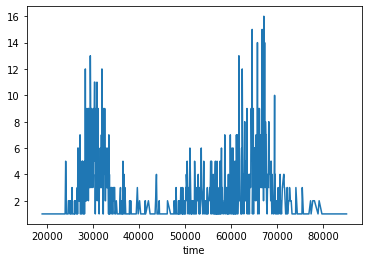

In [34]:
df_contacts.groupby("time").size().plot()